In [1]:
from collections import Counter
import pandas as pd
import os
from pre_process.load_sleep_data import LoadSleepData

load_sleep_data = LoadSleepData(
    data_type="spectrogram",
    verbose=0,
    fit_pos="middle",
    kernel_size=256,
    is_previous=False,
    stride=4,
    is_normal=True,
)
data = load_sleep_data.load_data(
    load_all=True,
)

*** すべての被験者を読み込みます（load_dataの引数:nameは無視します） ***
 140703_Li を読み込みます 
 140711_Yamamoto を読み込みます 
 140819_Kumazawa を読み込みます 
 140820_Yasuda を読み込みます 
 140821_Murakami を読み込みます 
 140823_Murakami を読み込みます 
 140825_Kashiwazaki を読み込みます 
 140826_Ootsuji を読み込みます 
 140828_Otsuji を読み込みます 
 140830_Murakami を読み込みます 
 140922_Kumazawa_M を読み込みます 
 140925_Kashiwazaki を読み込みます 
 140929_Kumazawa を読み込みます 
 140930_Hayashi を読み込みます 
 141001_Hayashi を読み込みます 
 141002_Hayashi を読み込みます 
 141003_Kashiwazaki_F を読み込みます 
 141006_Hiromoto を読み込みます 
 141014_Kumazawa_F を読み込みます 
 141015_Hiromoto を読み込みます 
 141024_Kawasaki_F を読み込みます 
 141027_Kawasaki を読み込みます 
 141029_Umezawa を読み込みます 
 141030_Kumazawa を読み込みます 
 141104_Takadama を読み込みます 
 141124_Murata を読み込みます 
 141127_Tatsumi を読み込みます 
 141128_Sato_Minato を読み込みます 
 141204_Tatebe を読み込みます 
 141205_Fujitsuka を読み込みます 
 141217_Sugimoto を読み込みます 
 141219_Usui を読み込みます 
 151104_Nagae を読み込みます 
 151105_Nagae を読み込みます 
 151106_Nagae を読み込みます 
 151111_Kawasaki を読み込みます 
 151112_Kawasaki を読み込みます 
 1

In [87]:
# グラフ描画のライブラリ
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os

def plot_images(images_arr, does_save: bool, filepath: str, time: list, ss: list, file_id: str):
    fig, axes = plt.subplots(1, 10, figsize=(8, 4))
    axes = axes.flatten()
    for img, ax, _time, _ss in zip(images_arr, axes, time, ss):
        ax.imshow(img)
        ax.axis("off")
        ax.set_title(_ss)
    plt.tight_layout()
    if does_save:
        abs_path = os.path.join(filepath, file_id+".png")
        plt.savefig(abs_path)
    plt.show()

def map_spectrogram(obj):
    return obj.spectrogram

def map_ss(obj):
    return obj.ss

def map_time(obj):
    return obj.time

def map_time_ss(obj):
    return obj.time, obj.ss

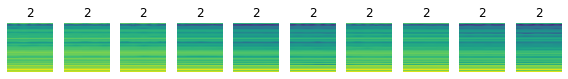

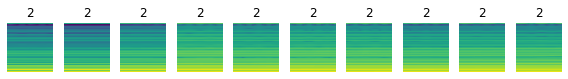

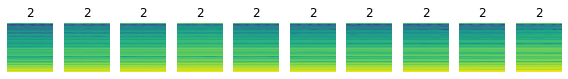

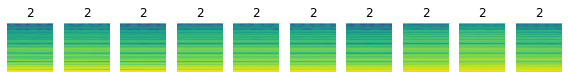

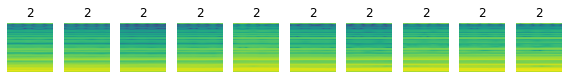

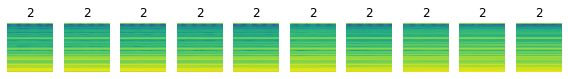

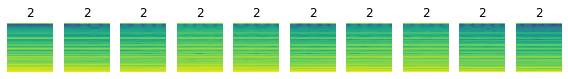

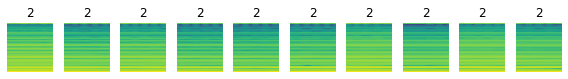

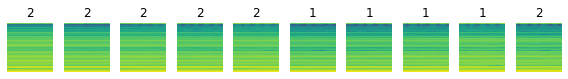

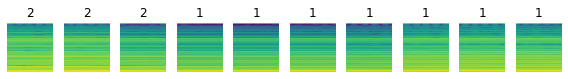

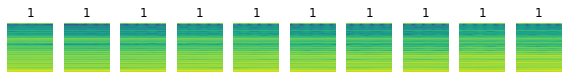

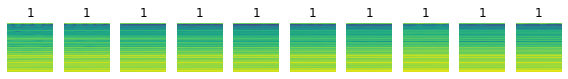

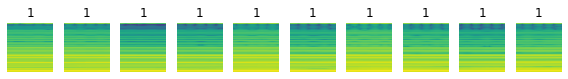

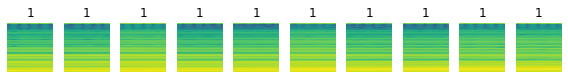

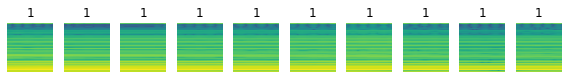

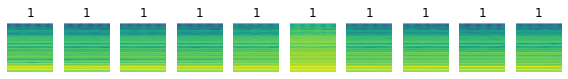

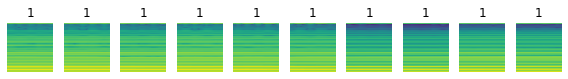

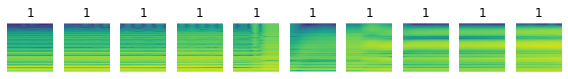

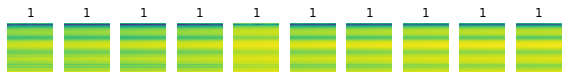

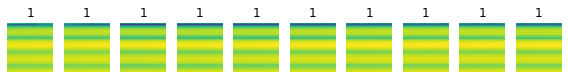

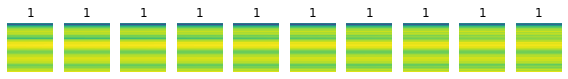

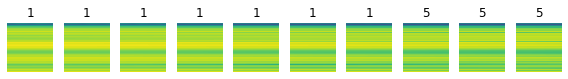

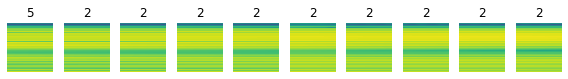

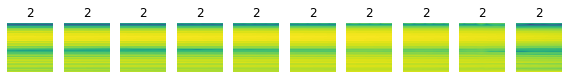

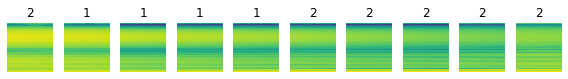

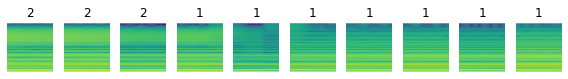

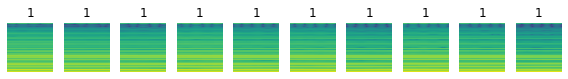

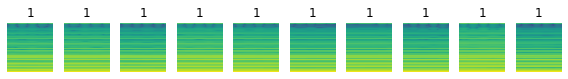

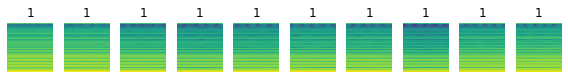

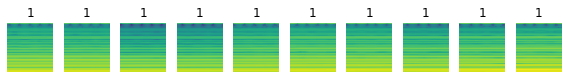

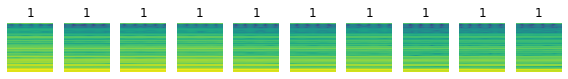

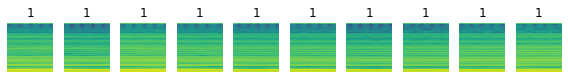

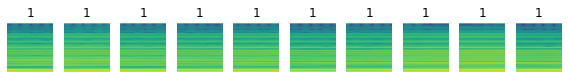

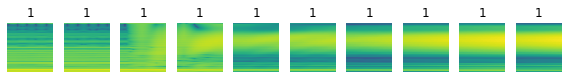

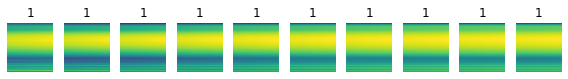

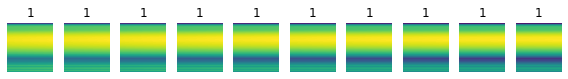

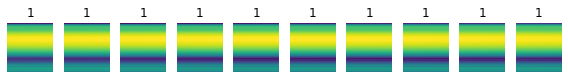

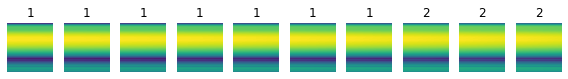

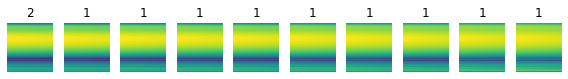

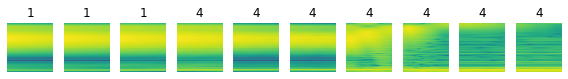

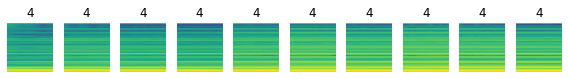

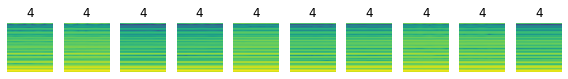

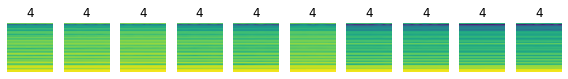

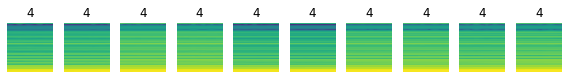

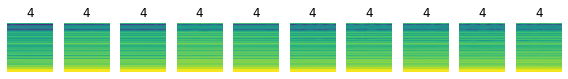

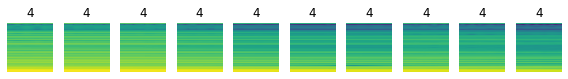

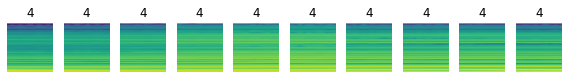

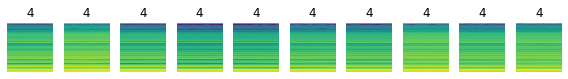

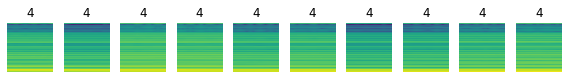

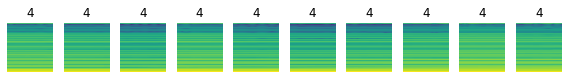

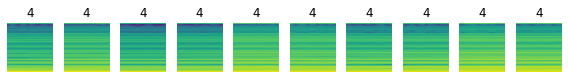

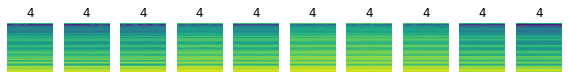

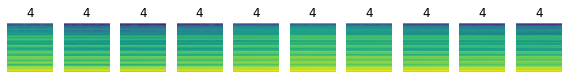

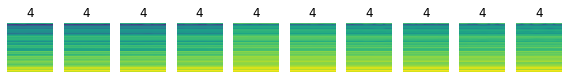

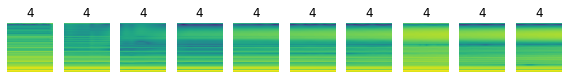

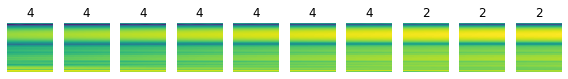

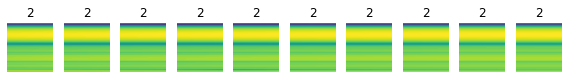

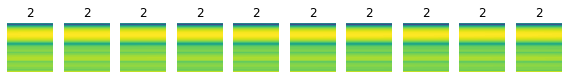

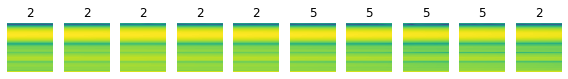

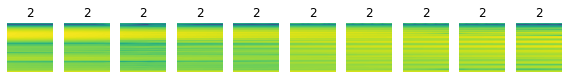

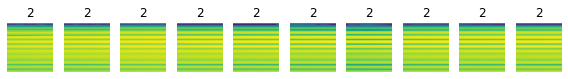

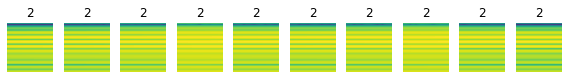

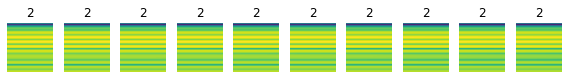

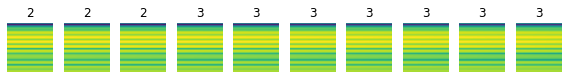

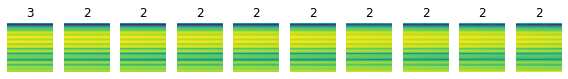

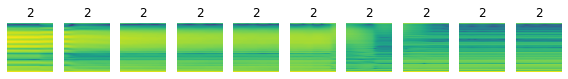

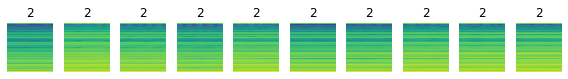

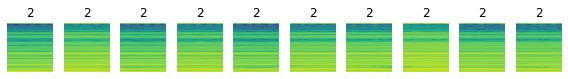

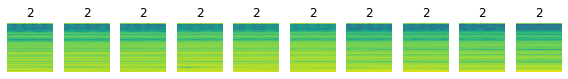

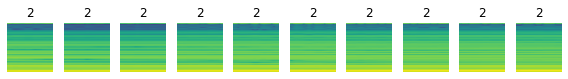

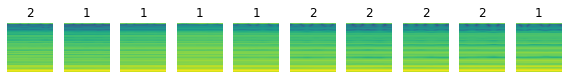

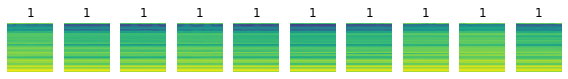

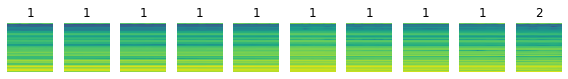

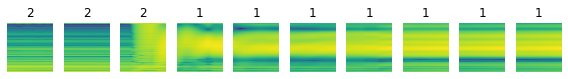

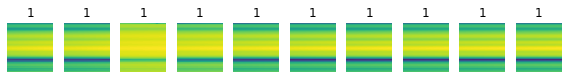

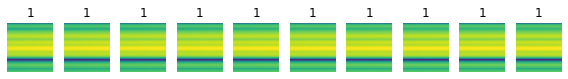

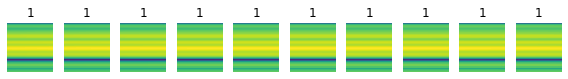

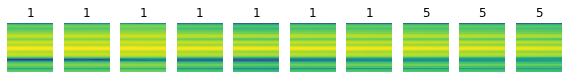

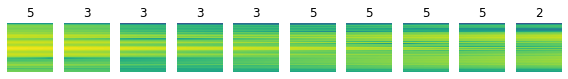

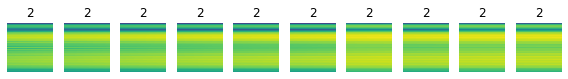

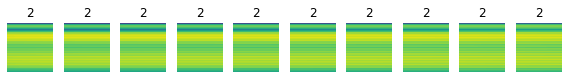

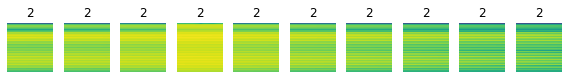

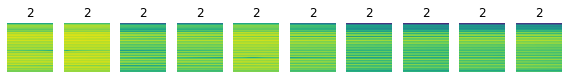

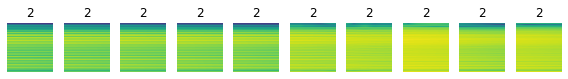

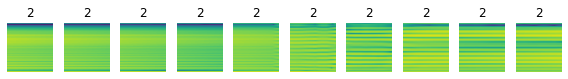

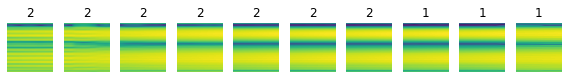

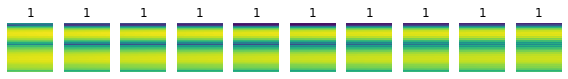

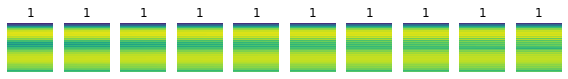

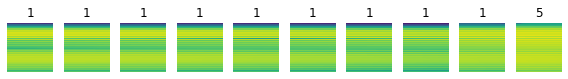

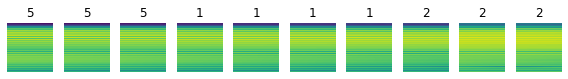

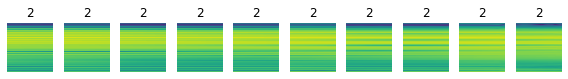

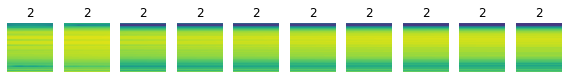

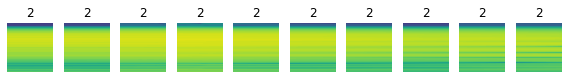

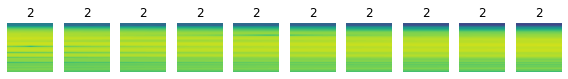

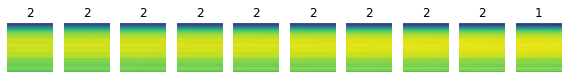

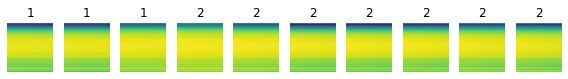

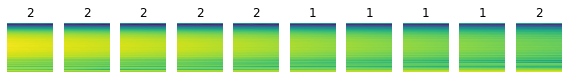

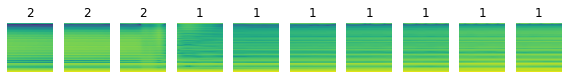

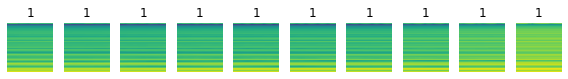

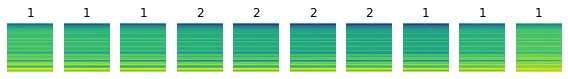

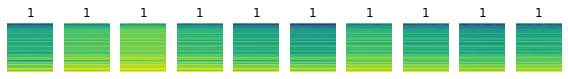

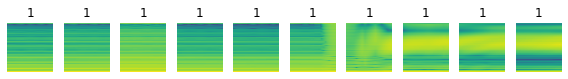

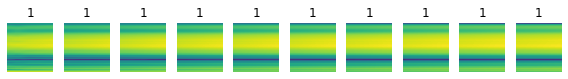

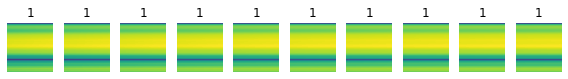

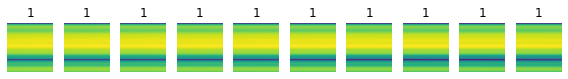

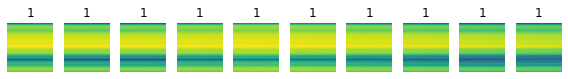

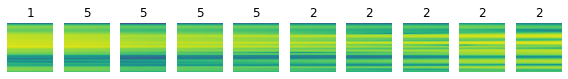

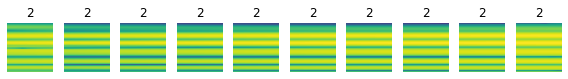

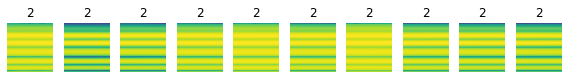

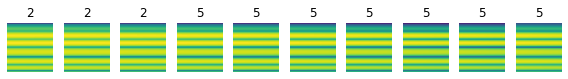

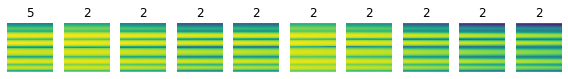

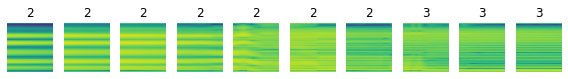

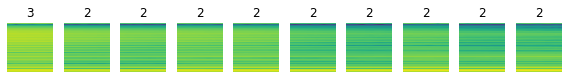

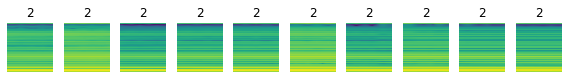

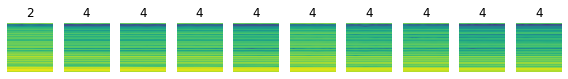

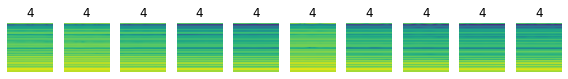

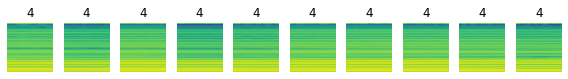

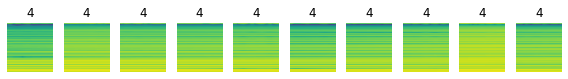

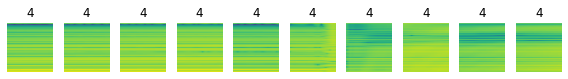

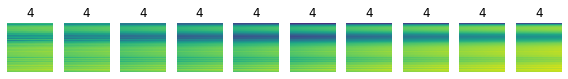

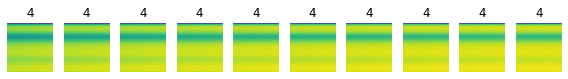

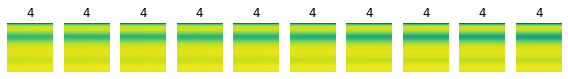

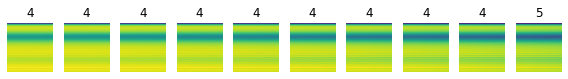

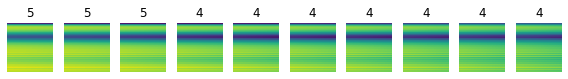

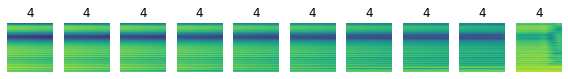

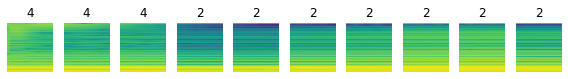

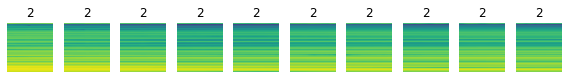

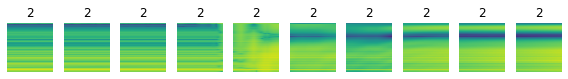

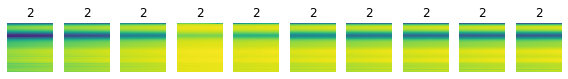

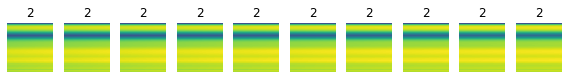

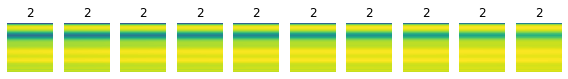

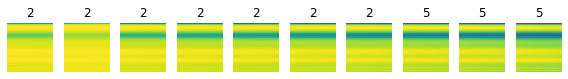

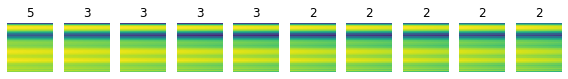

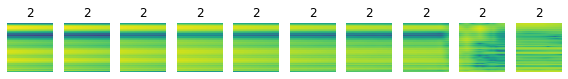

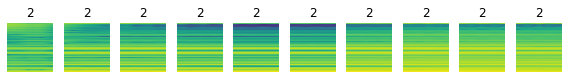

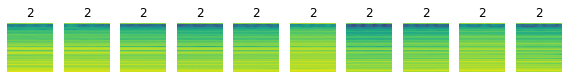

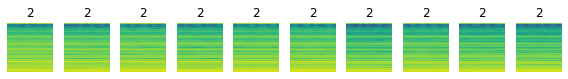

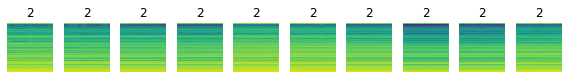

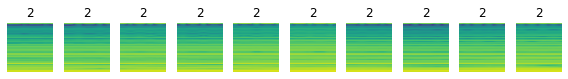

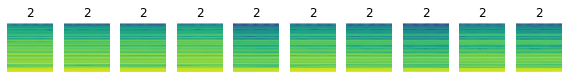

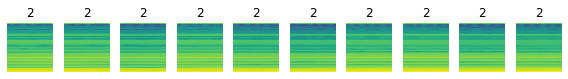

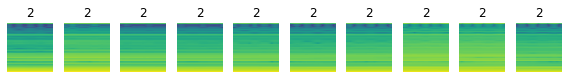

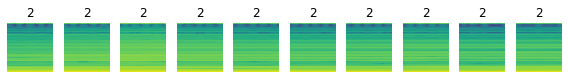

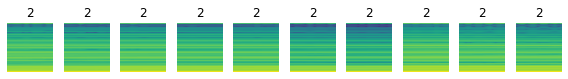

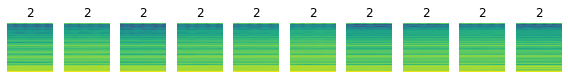

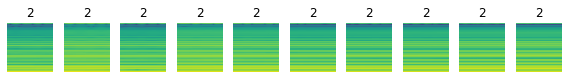

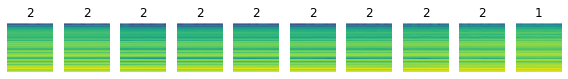

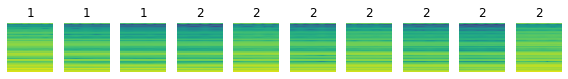

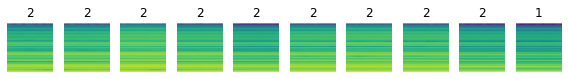

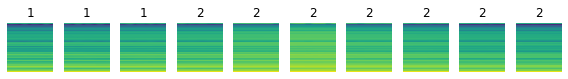

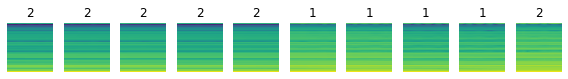

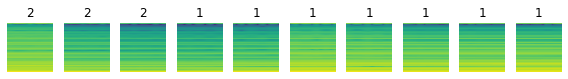

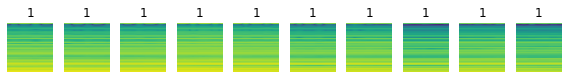

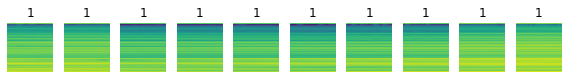

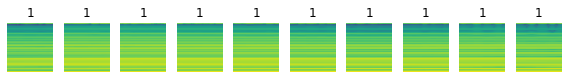

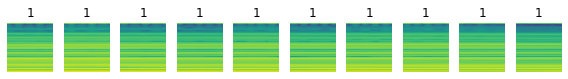

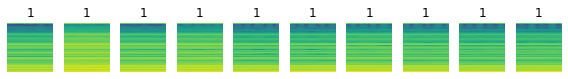

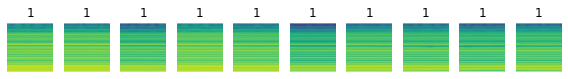

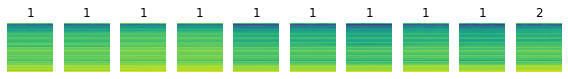

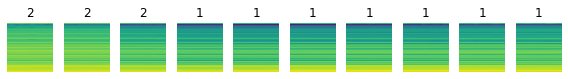

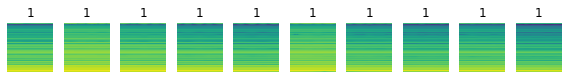

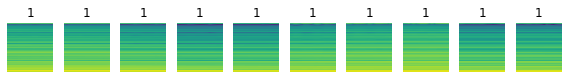

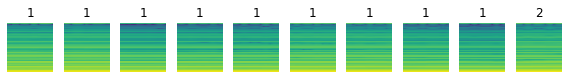

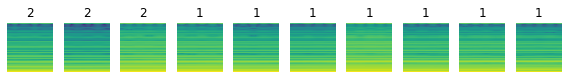

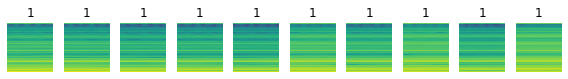

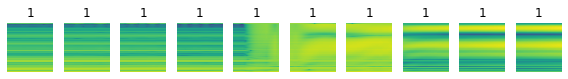

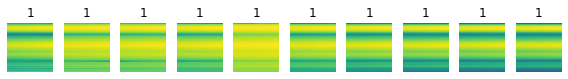

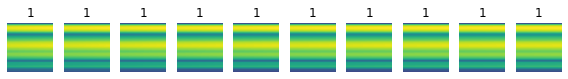

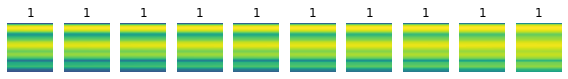

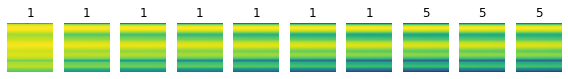

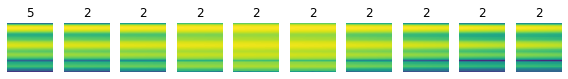

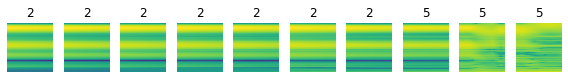

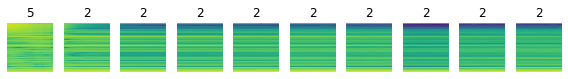

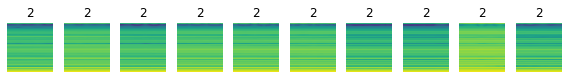

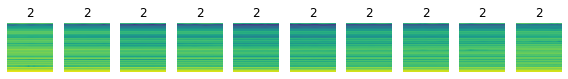

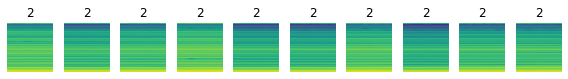

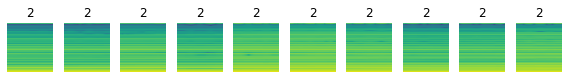

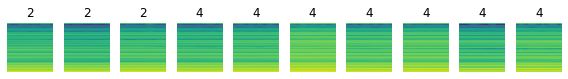

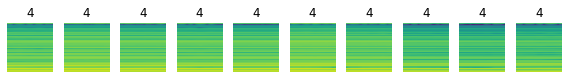

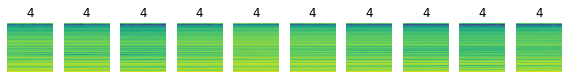

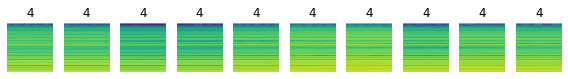

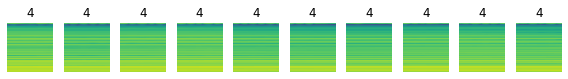

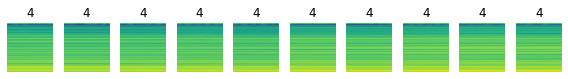

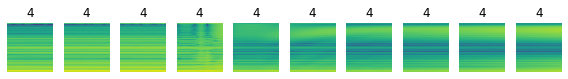

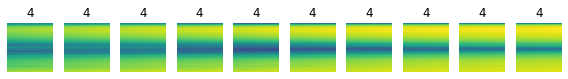

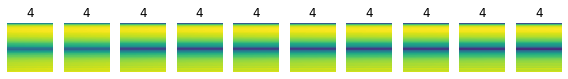

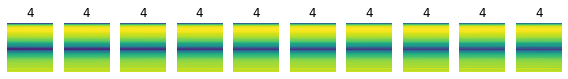

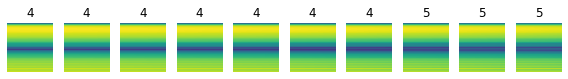

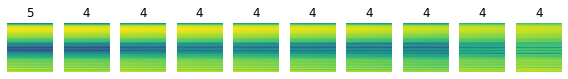

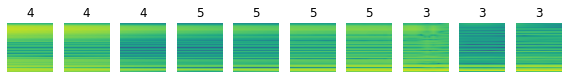

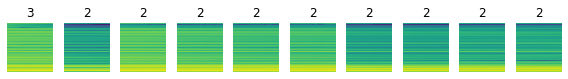

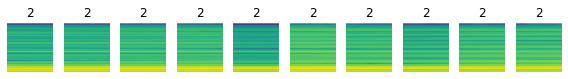

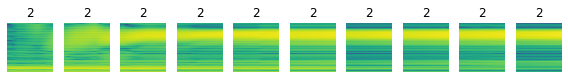

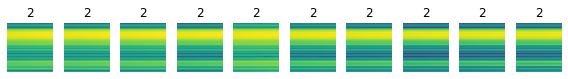

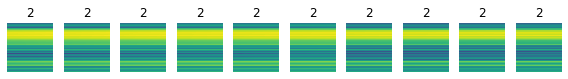

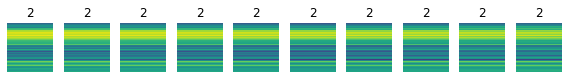

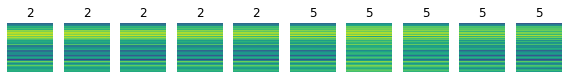

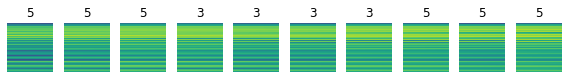

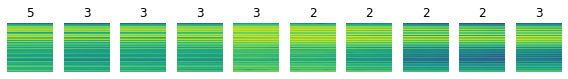

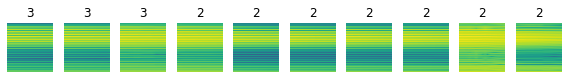

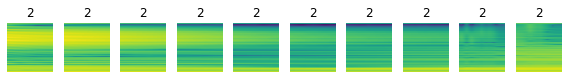

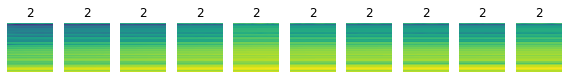

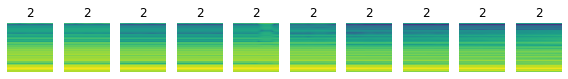

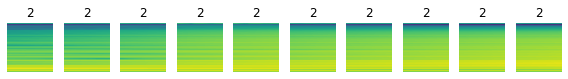

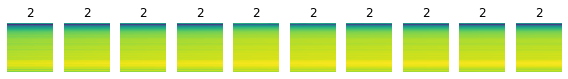

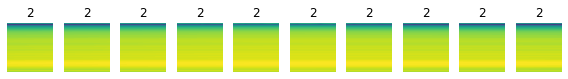

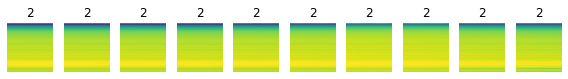

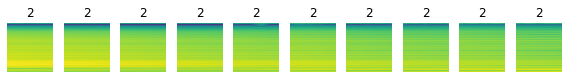

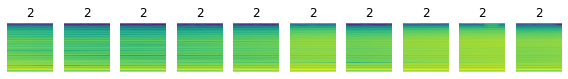

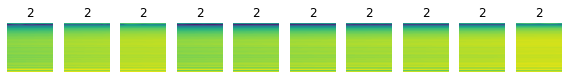

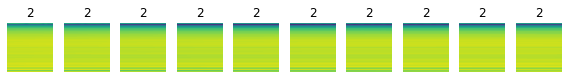

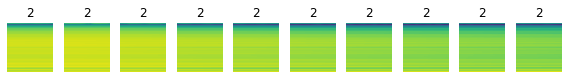

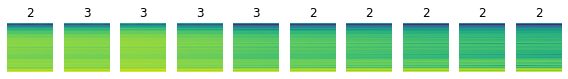

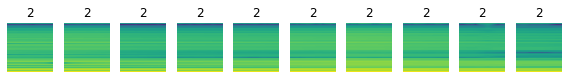

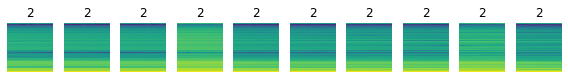

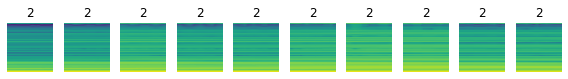

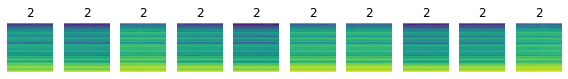

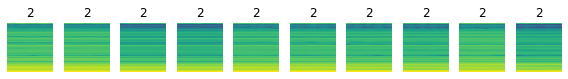

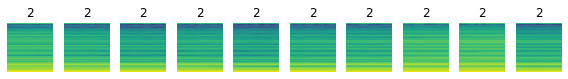

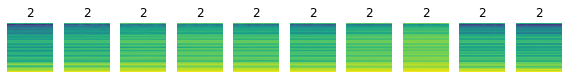

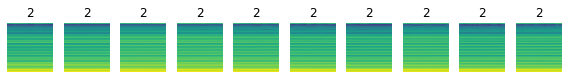

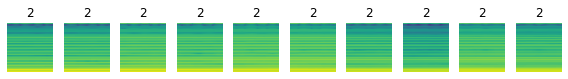

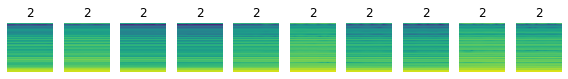

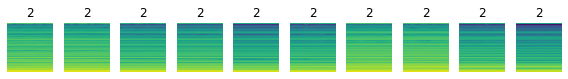

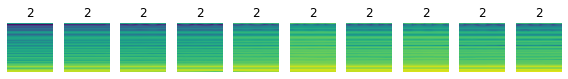

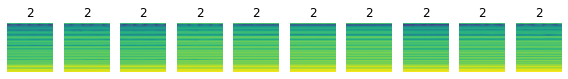

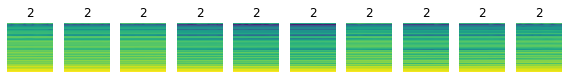

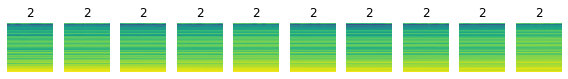

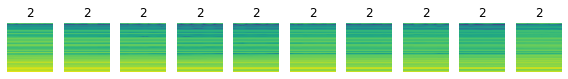

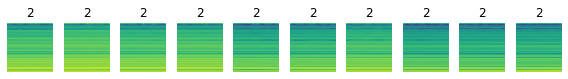

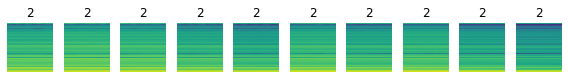

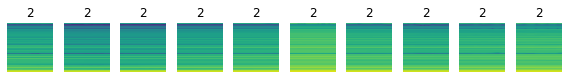

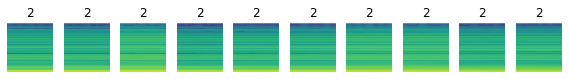

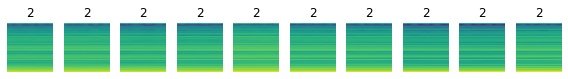

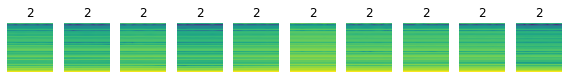

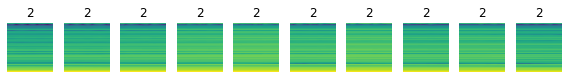

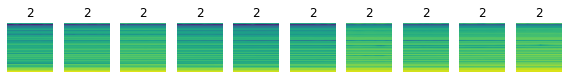

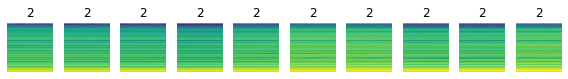

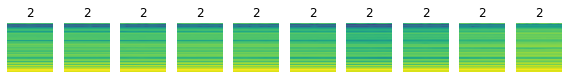

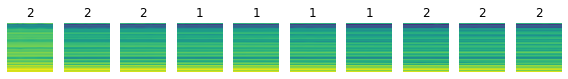

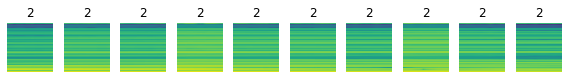

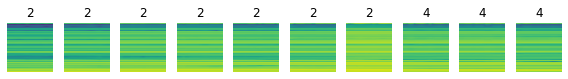

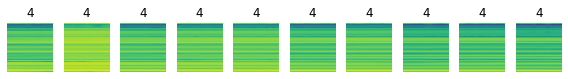

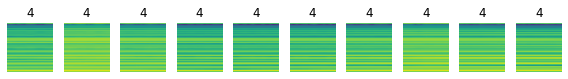

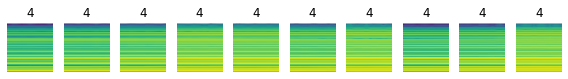

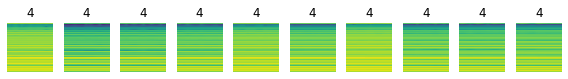

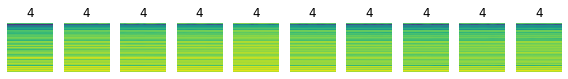

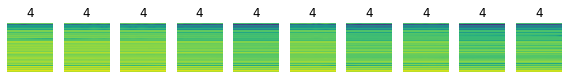

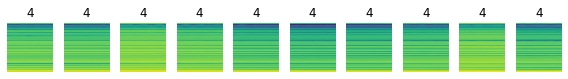

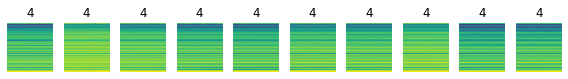

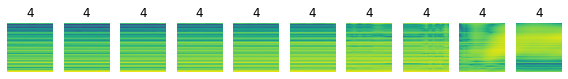

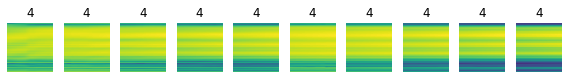

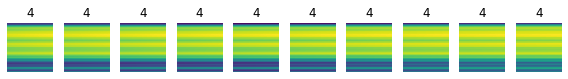

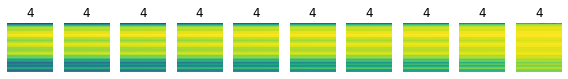

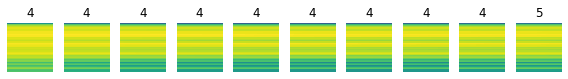

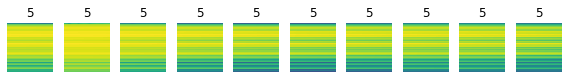

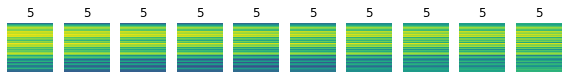

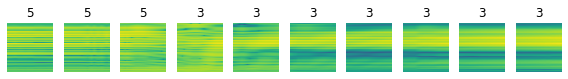

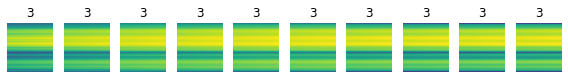

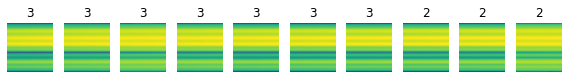

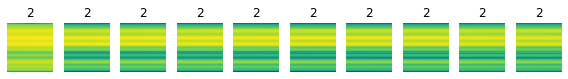

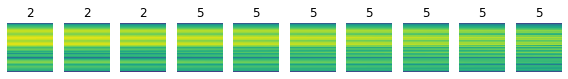

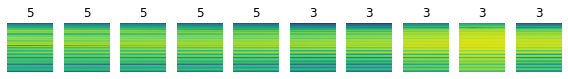

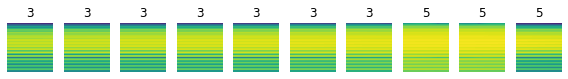

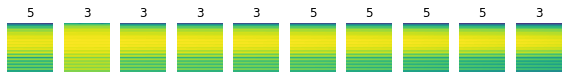

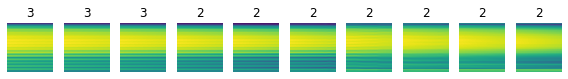

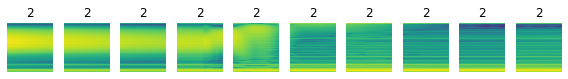

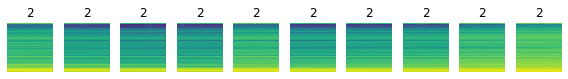

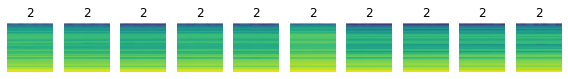

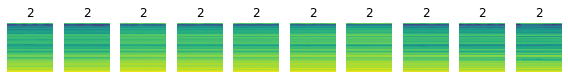

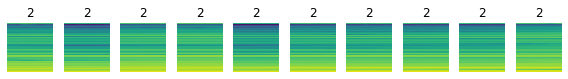

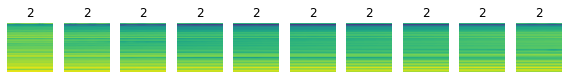

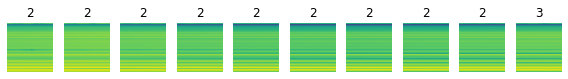

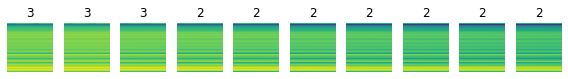

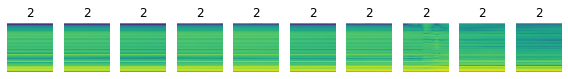

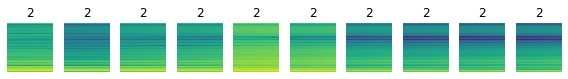

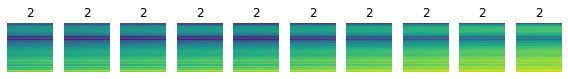

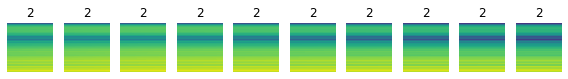

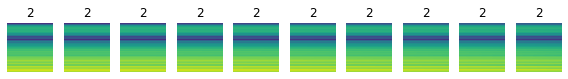

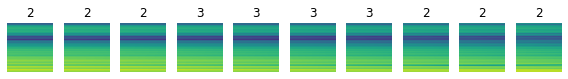

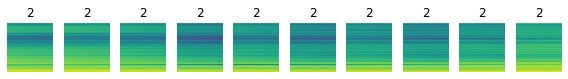

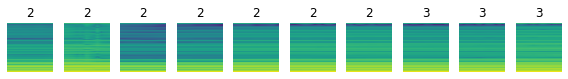

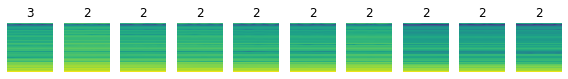

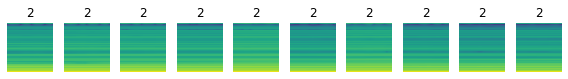

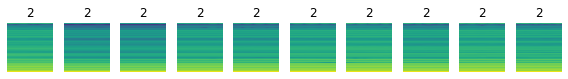

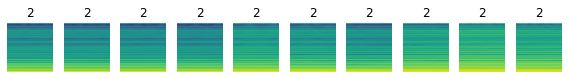

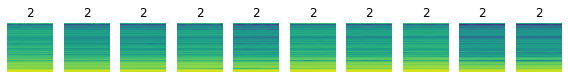

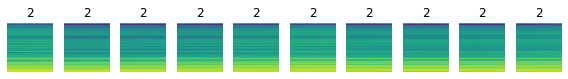

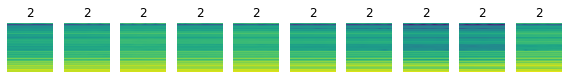

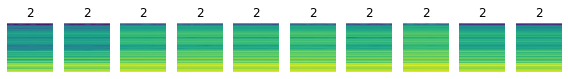

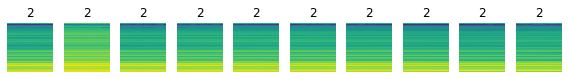

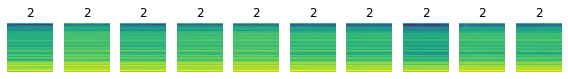

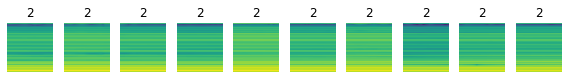

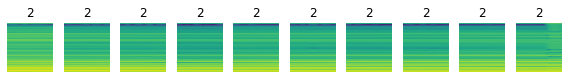

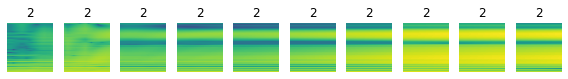

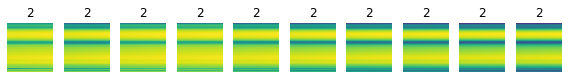

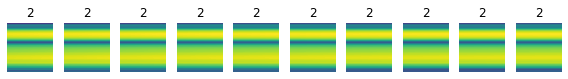

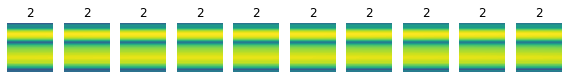

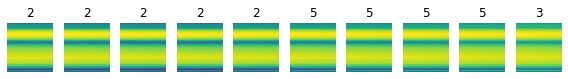

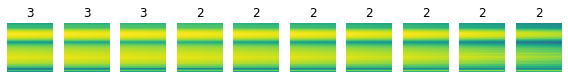

In [88]:
# ファイルパスをtmpの下に置く
filepath = os.path.join(os.environ["sleep"], "tmp", "spectrogram")
for start in range(0, 3000, 10):
    time = list()
    ss = list()
    stop = start + 10
    # 睡眠段階と時間をファイル名のために保存
    for _time, _ss in map(map_time_ss, data[0][start:stop]):
        time.append(_time)
        ss.append(_ss)
    plot_images(map(map_spectrogram, data[0][start:stop]), does_save = True,
               filepath = filepath, time = time, ss = ss, file_id=str(start))


In [56]:
ss = map(map_ss, data[0])
Counter(ss)

Counter({2: 1661, 1: 656, 5: 415, 4: 704, 3: 156, None: 1958})

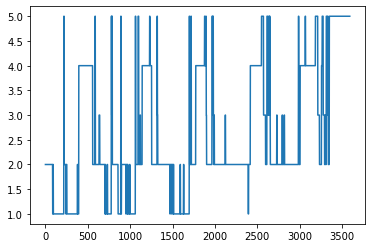

In [58]:
ss = map(map_ss, data[0])
plt.plot(list(ss))